In [1]:
# Download the Libraries

"""
Package Imports for Supervised Machine Learning 

Preprocessing:

- IterativeImputer: models a column with the missing values (target variable) as a function of other features (predictor variables) in a round-robin fashion. 
"""

from sklearn.preprocessing import StandardScaler,scale

"""
Scikit-Learn Models:

- Linear Regression
- K Nearest Neighbors for Regression
- Decision Tree for Regression
- Random Forest Classifier
"""

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

"""
Model Training:

- Training / Testing Set: train_test_split
- Hyperparameter Tuning: Grid Search  with K-Fold Cross Validation 
"""

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

"""
Evaluate the Models
"""
from sklearn.metrics import auc, roc_curve, accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix,precision_recall_fscore_support,RocCurveDisplay

"""
Data Processing and Visualization Modules

Processing Modules:
- numpy 
- pandas

Visualization Modules:
- matplotlib
- seaborn
"""


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from statsmodels.multivariate.pca import PCA 



### **Data Visualization**

In [2]:
# Create the Data Frame 

df = pd.read_csv("Resources/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
# Seeing the types of variables and how many variables are present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## **Exploratory Data Analysis (EDA): Visualization**

In [5]:
plt.style.use('ggplot')

<AxesSubplot:>

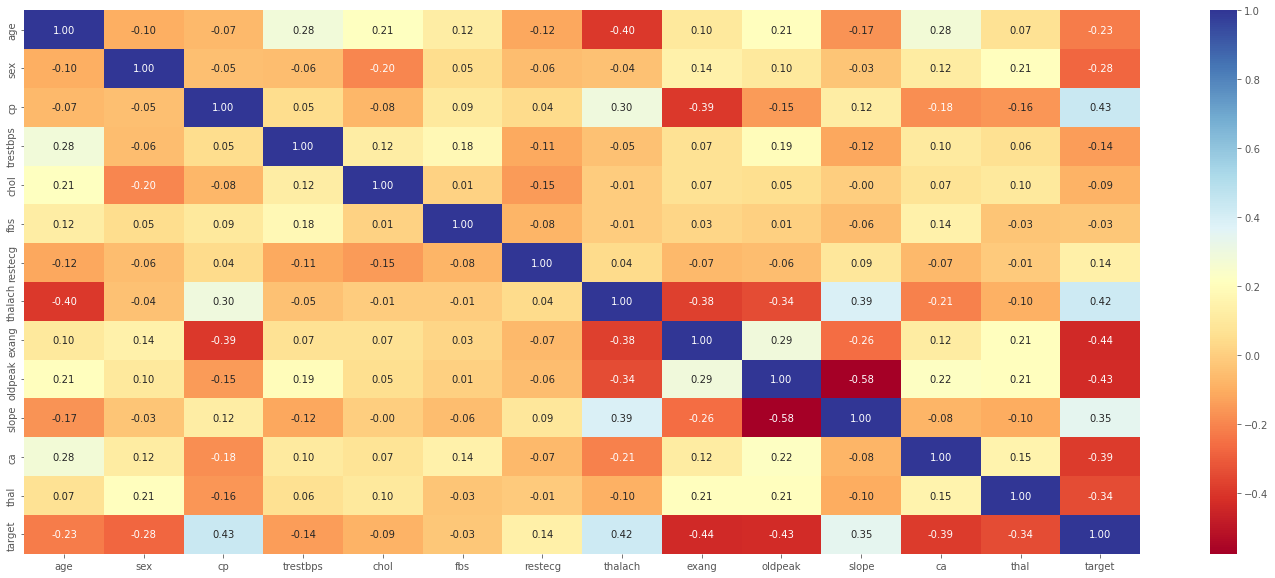

In [6]:
fig, ax = plt.subplots(figsize=(25,10))
df_cov = df.corr()
sns.heatmap(df_cov, cmap='RdYlBu', annot=True, fmt='.2f')


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
X = df.drop(columns=['target'])
y = df['target']

In [9]:
X= scale(X)
df_x = pd.DataFrame(X)
df_x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-1.319077e-17,-5.562565e-17,-7.146832e-16,-9.828955e-17,-3.664102e-19,2.652810e-16,-5.203025e-16,-5.203025e-16,-3.140136e-16,1.355718e-16,4.752341e-16,3.484561e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-1.468418e+00,-9.385146e-01,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-3.784824e+00
25%,-7.572802e-01,-1.468418e+00,-9.385146e-01,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
50%,6.988599e-02,6.810052e-01,3.203122e-02,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
75%,7.316189e-01,6.810052e-01,1.002577e+00,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.123029e+00
max,2.496240e+00,6.810052e-01,1.973123e+00,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.123029e+00


### **Data Balancing**


<AxesSubplot:ylabel='target'>

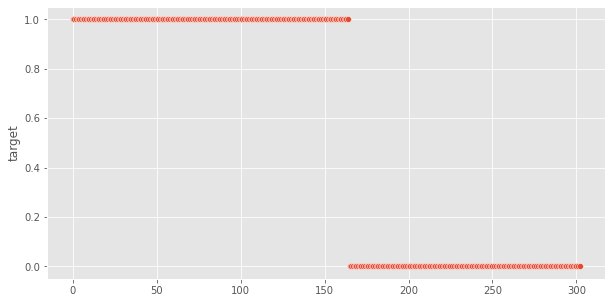

In [10]:
############# Scatter plot of target column (1 has disease and 0 doesn't has disease) ############################

scatter = pd.DataFrame()
scatter['target'] = df['target']
plt.figure(figsize=(10,5))
sns.scatterplot(data=scatter, x=scatter.index, y= 'target')

<AxesSubplot:ylabel='target'>

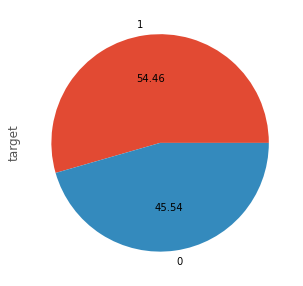

In [11]:
plt.figure(figsize=(10,5))
y.value_counts().plot.pie(autopct = '%.2f')

**SMOTE Technique**

In [12]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [13]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [14]:
sm = RandomOverSampler()
X, y = sm.fit_resample(X,y)
y.count()

330

<AxesSubplot:ylabel='target'>

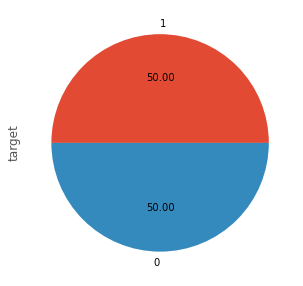

In [15]:
plt.figure(figsize=(10,5))
y.value_counts().plot.pie(autopct = '%.2f')

In [16]:

############# Traian tests from X and y variables withput balanced ############################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify = y)

### **Models**

**Logistic Regression**

In [17]:
############# Declare model as Logistic Regression ############################
model_1 = LogisticRegression()

In [18]:
# Choosing the hyperparameters range and fit it
param_grid_1 = {'solver': ['newton-cg','lbfgs','liblinear', 'sag','saga']}
LR_CV = GridSearchCV(model_1,param_grid_1, cv =8,scoring = 'recall')
LR_CV.fit(X_train,y_train)

GridSearchCV(cv=8, estimator=LogisticRegression(),
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall')

In [19]:
### See the best Score and the hyperparameters in the model
print(f'Best n_neighbors:{LR_CV.best_params_}')
print(f'Score:{LR_CV.best_score_}')

Best n_neighbors:{'solver': 'newton-cg'}
Score:0.8630514705882353


In [20]:
############# Get the best model the model, And the features coef_   ############################
LR_CV = LR_CV.best_estimator_
LR_coef = LR_CV.coef_[0]

Text(0, 0.5, 'Coef.')

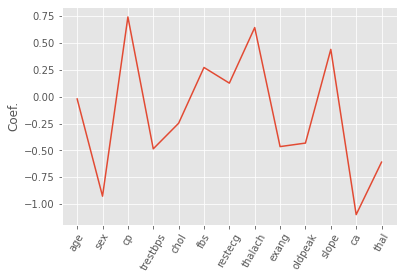

In [21]:
### Plot the coef of the features 
plt.plot(range(len(df.columns)-1),LR_coef)
plt.xticks(range(len(df.columns)-1), ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],rotation = 60)
plt.ylabel('Coef.')


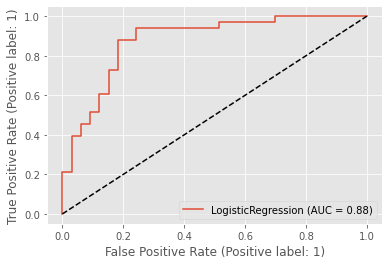

In [22]:
## Plot roc_curve
RocCurveDisplay.from_estimator(LR_CV,X_test,y_test)
plt.plot([0,1],[0,1],'k--')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


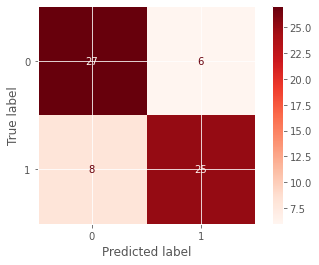

In [23]:
# Plot the Confusion Matrix values
plot_confusion_matrix(LR_CV, X_test, y_test, cmap=plt.cm.Reds)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


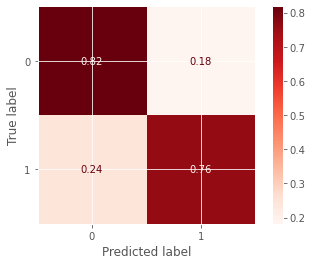

In [24]:
# Plot the Confusion Matrix values
plot_confusion_matrix(LR_CV, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [25]:
y1_pred = LR_CV.predict(X_test)
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        33
           1       0.81      0.76      0.78        33

    accuracy                           0.79        66
   macro avg       0.79      0.79      0.79        66
weighted avg       0.79      0.79      0.79        66



**KNeighborsClassifier**

In [26]:
#Creating the model
model_2 = KNeighborsClassifier()

In [27]:
# Choosing the hyperparameters range and fit it
param_grid_2 = {'n_neighbors': np.arange(1,50), 'algorithm':['auto', 'ball_tree','kd_tree','brute']}
KNN_CV = GridSearchCV(model_2,param_grid_2, cv =8,scoring = 'recall')
KNN_CV.fit(X_train,y_train)

GridSearchCV(cv=8, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='recall')

In [28]:
### See the best Score and the hyperparameters in the model and get the model
print(f'Best n_neighbors:{KNN_CV.best_params_}')
print(f'Score:{KNN_CV.best_score_}')
KNN_CV = KNN_CV.best_estimator_
print(KNN_CV)

Best n_neighbors:{'algorithm': 'auto', 'n_neighbors': 47}
Score:0.9306066176470589
KNeighborsClassifier(n_neighbors=47)


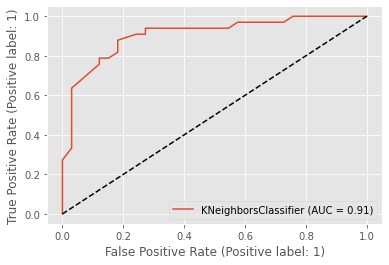

In [29]:
#Plot the ROC curve
RocCurveDisplay.from_estimator(KNN_CV,X_test,y_test)
plt.plot([0,1],[0,1],'k--')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


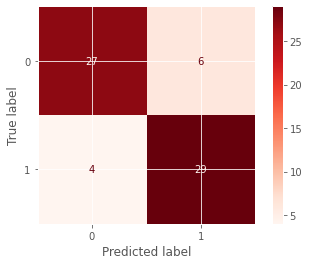

In [30]:
# Plot the Confusion Matrix values
plot_confusion_matrix(KNN_CV, X_test, y_test, cmap=plt.cm.Reds)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


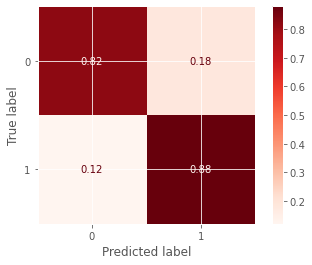

In [31]:
# Plot the Confusion Matrix values
plot_confusion_matrix(KNN_CV, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [32]:
y2_pred = KNN_CV.predict(X_test)
print(classification_report(y_test,y2_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.83      0.88      0.85        33

    accuracy                           0.85        66
   macro avg       0.85      0.85      0.85        66
weighted avg       0.85      0.85      0.85        66



**Decision Tree**

In [33]:
model_3 = DecisionTreeClassifier()


In [34]:
# Choosing the hyperparameters range and fit it
param_grid_3 = {'max_depth': np.arange(5,21),'max_leaf_nodes':np.arange(5,21),'min_samples_split':np.arange(2,35),'criterion':['gini', 'entropy'],'max_features':['sqrt','log2']}
DTC_CV= GridSearchCV(model_3,param_grid_3, cv =8,scoring = 'recall')
DTC_CV.fit(X_train,y_train)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])},
             scoring='recall')

In [35]:
### See the best Score and the hyperparameters in the model and get the model
print(f'Best n_neighbors:{DTC_CV.best_params_}')
print(f'Score:{DTC_CV.best_score_}')
DTC_CV = DTC_CV.best_estimator_
print(DTC_CV)

Best n_neighbors:{'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_split': 30}
Score:0.9076286764705882
DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features='sqrt',
                       max_leaf_nodes=5, min_samples_split=30)


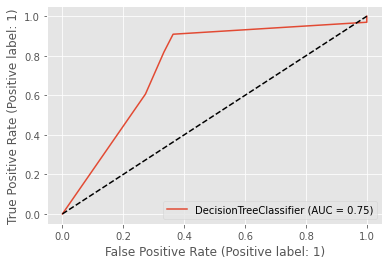

In [36]:
#Plot the ROC curve
RocCurveDisplay.from_estimator(DTC_CV,X_test,y_test)
plt.plot([0,1],[0,1],'k--')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


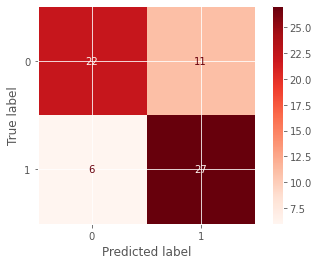

In [37]:
# Plot the Confusion Matrix values
plot_confusion_matrix(DTC_CV, X_test, y_test, cmap=plt.cm.Reds)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


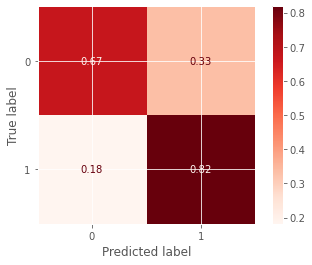

In [38]:
# Plot the Confusion Matrix values
plot_confusion_matrix(DTC_CV, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [39]:
y3_pred = DTC_CV.predict(X_test)
print(classification_report(y_test,y3_pred))

              precision    recall  f1-score   support

           0       0.79      0.67      0.72        33
           1       0.71      0.82      0.76        33

    accuracy                           0.74        66
   macro avg       0.75      0.74      0.74        66
weighted avg       0.75      0.74      0.74        66



**Random Forest**

In [40]:
model_4 = RandomForestClassifier()

In [41]:
# Choosing the hyperparameters range and fit it
param_grid_4 = {'n_estimators': np.arange(1,50),'criterion':['gini', 'entropy'],'max_depth': np.arange(5,16),'min_samples_split':np.arange(2,20),'max_features':['sqrt','log2'],'max_leaf_nodes':np.arange(1,11)}
RFC_CV= RandomizedSearchCV(model_4,param_grid_4, cv =6,scoring = 'recall') ## GridSearchCV
RFC_CV.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.9/site-packages/jobl

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                   scoring='recall')

In [42]:
### See the best Score and the hyperparameters in the model and get the model
print(f'Best n_neighbors:{RFC_CV.best_params_}')
print(f'Score:{RFC_CV.best_score_}')
RFC_CV = RFC_CV.best_estimator_
print(RFC_CV)

Best n_neighbors:{'n_estimators': 15, 'min_samples_split': 7, 'max_leaf_nodes': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}
Score:0.8787878787878788
RandomForestClassifier(max_depth=10, max_leaf_nodes=4, min_samples_split=7,
                       n_estimators=15)


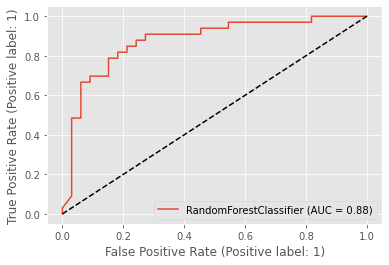

In [43]:
#Plot the ROC curve
RocCurveDisplay.from_estimator(RFC_CV,X_test,y_test)
plt.plot([0,1],[0,1],'k--')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


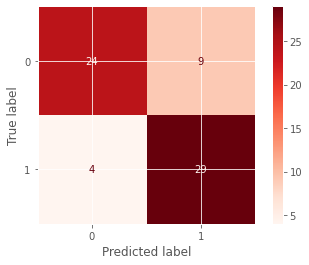

In [44]:
# Plot the Confusion Matrix values
plot_confusion_matrix(RFC_CV, X_test, y_test, cmap=plt.cm.Reds)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


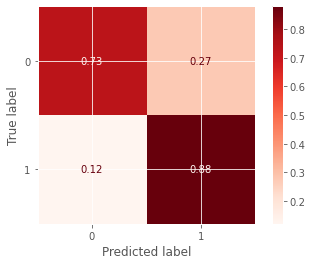

In [45]:
# Plot the Confusion Matrix values
plot_confusion_matrix(RFC_CV, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [46]:
y4_pred = RFC_CV.predict(X_test)
print(classification_report(y_test,y4_pred))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.76      0.88      0.82        33

    accuracy                           0.80        66
   macro avg       0.81      0.80      0.80        66
weighted avg       0.81      0.80      0.80        66



**SVC**

In [47]:
model_5 = SVC()

In [48]:
# Choosing the hyperparameters range and fit it
param_grid_5 = {'C': np.arange(0.1,10,0.5),'kernel':['linear', 'poly','rbf']}
SVC_CV= GridSearchCV(model_5,param_grid_5, cv =8,scoring = 'recall') #GridSearchCV
SVC_CV.fit(X_train,y_train)

GridSearchCV(cv=8, estimator=SVC(),
             param_grid={'C': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1,
       6.6, 7.1, 7.6, 8.1, 8.6, 9.1, 9.6]),
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='recall')

In [49]:
### See the best Score and the hyperparameters in the model and get the model
print(f'Best n_neighbors:{SVC_CV.best_params_}')
print(f'Score:{SVC_CV.best_score_}')
SVC_CV = SVC_CV.best_estimator_
print(SVC_CV)

Best n_neighbors:{'C': 0.1, 'kernel': 'poly'}
Score:0.9692095588235294
SVC(C=0.1, kernel='poly')


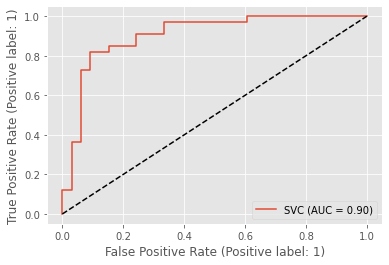

In [50]:
#Plot the ROC curve
RocCurveDisplay.from_estimator(SVC_CV,X_test,y_test)
plt.plot([0,1],[0,1],'k--')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


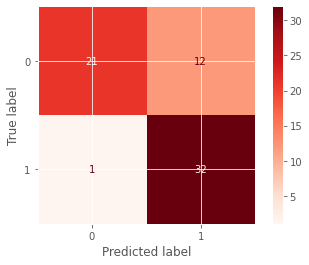

In [51]:
# Plot the Confusion Matrix values
plot_confusion_matrix(SVC_CV, X_test, y_test, cmap=plt.cm.Reds)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


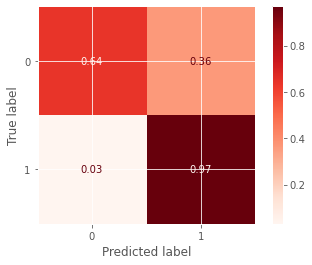

In [52]:
# Plot the Confusion Matrix values
plot_confusion_matrix(SVC_CV, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [53]:
y5_pred = SVC_CV.predict(X_test)
print(classification_report(y_test,y5_pred))

              precision    recall  f1-score   support

           0       0.95      0.64      0.76        33
           1       0.73      0.97      0.83        33

    accuracy                           0.80        66
   macro avg       0.84      0.80      0.80        66
weighted avg       0.84      0.80      0.80        66



## Results Vizualization

In [54]:
plt.style.use('seaborn-white')

In [55]:
preds = [y1_pred,y2_pred,y3_pred,y4_pred,y5_pred]
titles = ['Logistic Regression', "K-Neighbors", "Decision Tree", "Random Forest", "SVC"]
x = np.arange(5)

acc = []
recall_ls = []
AUC = []
for i in preds: 

  # Get the accuracy for all models
    mse = accuracy_score(y_test,i)
    acc.append(mse)

    # Get the Recal for True Values in all models
    recision,recall,fscore,support= precision_recall_fscore_support(y_test,i,labels = [1] )
    recall_ls.append(recall[0])

    # Get the AUC value for all models
    fpr, tpr, thresholds = roc_curve(y_test,i)
    roc_auc = auc(fpr, tpr)
    AUC.append(roc_auc)
  

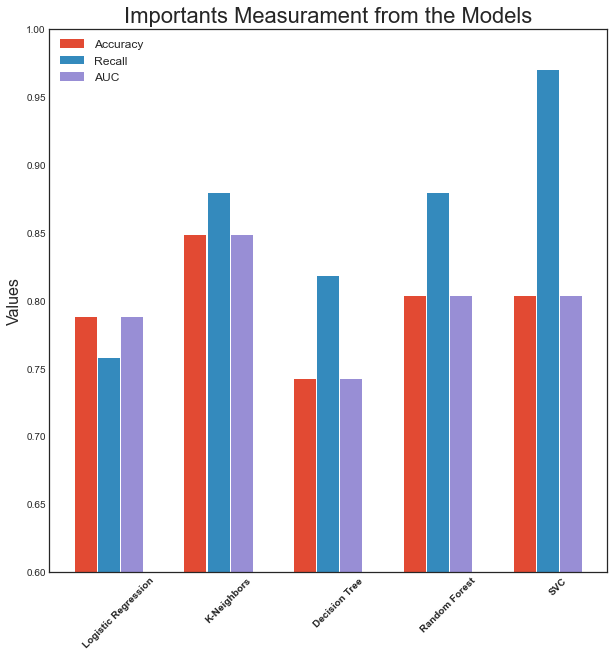

In [56]:
plt.figure(figsize=(10,10))

x = np.arange(5)

plt.bar(x , height = acc,width = 0.2, label='Accuracy')
plt.bar(x + 0.21, height = recall_ls,width = 0.2, label='Recall')
plt.bar(x + 0.42, height = AUC,width = 0.2, label='AUC')

plt.xticks(x + 0.6 / 2, ('Logistic Regression', "K-Neighbors", "Decision Tree", "Random Forest", "SVC"), fontsize=10,rotation=45, weight='bold')

plt.title('Importants Measurament from the Models', fontsize=22)
plt.ylabel('Values', fontsize=16)
plt.ylim([0.6,1])

plt.legend(loc='best', fontsize=12)
plt.show()
